In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pt
import bls

In [3]:
# cpi = bls.get_series("CUUR0000SA0")
# cpi.to_csv('bls_cpi_data.csv')
cpi_data = pd.read_csv('bls_cpi_data.csv')

In [ ]:
cpi_data.columns = 'Date', 'CPI'
cpi_data['Date'] = cpi_data['Date'].str.replace('-03', 'Q1')
cpi_data['Date'] = cpi_data['Date'].str.replace('-06', 'Q2')
cpi_data['Date'] = cpi_data['Date'].str.replace('-09', 'Q3')
cpi_data['Date'] = cpi_data['Date'].str.replace('-12', 'Q4')
newcpi = cpi_data[(cpi_data.Date.str.contains("-") == False)]
newcpi.to_csv('cpi-clean.csv')
newcpi

In [12]:
#wages = bls.get_series('CIU2020000000000A')
#wages.to_csv('bls_wages_data.csv')
df = pd.read_csv('bls_wages_data.csv')
df.columns = 'Date', 'Wages'
df

,Date,Wages
0,2013Q1,1.7
1,2013Q2,1.9
2,2013Q3,1.8
3,2013Q4,2.1
4,2014Q1,1.7
5,2014Q2,1.9
6,2014Q3,2.3
7,2014Q4,2.2
8,2015Q1,2.8
9,2015Q2,2.2


In [17]:
newdf = df
newnum = 177.1
def process_wages(x):
    global newnum
    if type(x) is str:
        return x
    elif x:
        newnum = (x / 400) * newnum + newnum
        return newnum
    else:
        return
    
newwages = newdf.applymap(process_wages)
newwages

,Date,Wages
0,2013Q1,177.852675
1,2013Q2,178.697475
2,2013Q3,179.501614
3,2013Q4,180.443997
4,2014Q1,181.210884
5,2014Q2,182.071636
6,2014Q3,183.118548
7,2014Q4,184.125700
8,2015Q1,185.414580
9,2015Q2,186.434360


In [ ]:
merged_data = pd.merge(newcpi, newwages, on='Date')
merged_data

In [ ]:
### Introduction

Text(0.5, 0, 'Dates')

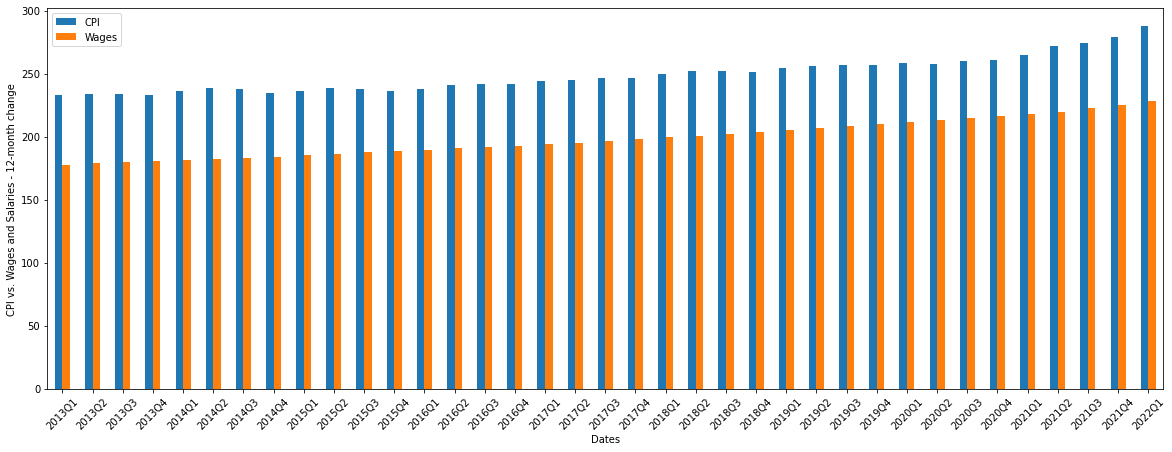

In [19]:
ax = merged_data.plot(kind='bar', figsize=(20, 7))
ax.set_xticklabels(merged_data.Date, rotation=45)
ax.set_ylabel('CPI vs. Wages and Salaries - 12-month change')
ax.set_xlabel('Dates')

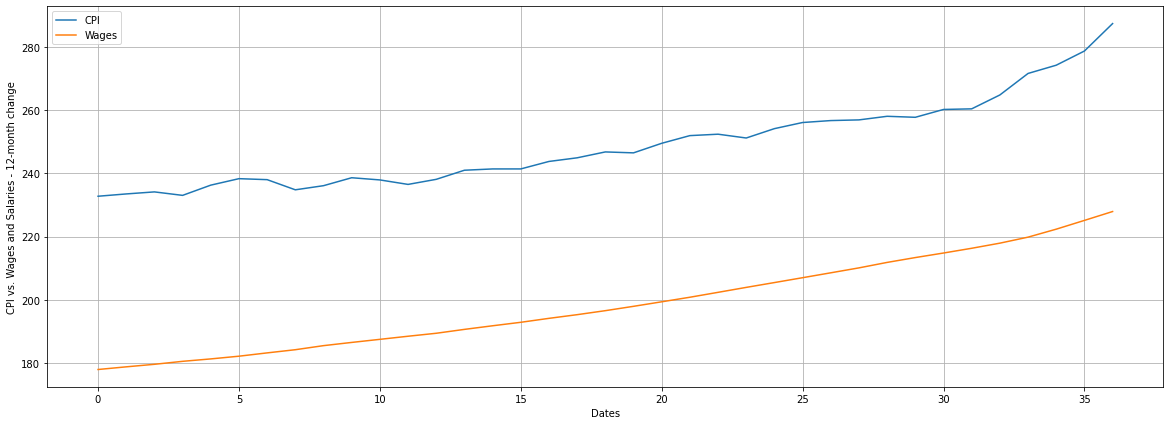

In [21]:
ax = merged_data.plot(kind='line', figsize=(20, 7))
ax.set_ylabel('CPI vs. Wages and Salaries - 12-month change')
ax.set_xlabel('Dates')
ax.grid()